In [ ]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /shared-libs/python3.7/py/lib/python3.7/site-packages (4.14.3)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<p align="center">
  <img width="500" height ="300" src="https://github.com/SreenidhiDurgam3/DATA-690-WANG/blob/main/world_development_explorer/charts/Picture1.png">
</p>

[**https://datatopics.worldbank.org/world-development-indicators/**](https://datatopics.worldbank.org/world-development-indicators/) **-** I had a skim through the webpage and really liked the UI and the way they are presenting open source data along with data indicators understanding and data types , time , location information. The best part of this webpage is[http://www.worlddev.xyz/](http://www.worlddev.xyz/) - where we can actually visualize the data on cloud and without any third party tool like python, R and tableau we can do actual visualizations and analyze this data – I loved the way this website is built and I really appreciate this and thanks to Chaoji Wang for sharing this webpage with us – I am very sure most of us would use this open source data in many future projects and for our career development establishment.

<p align="center">
  <img width="500" height ="300" src="https://github.com/SreenidhiDurgam3/DATA-690-WANG/blob/main/world_development_explorer/charts/Picture2.png">
</p>

<p align="center">
  <img width="500" height ="300" src="https://github.com/SreenidhiDurgam3/DATA-690-WANG/blob/main/world_development_explorer/charts/Picture3.png">
</p>
<p align="center">
  <img width="500" height ="300" src="https://github.com/SreenidhiDurgam3/DATA-690-WANG/blob/main/world_development_explorer/charts/Picture4.png">
</p>

<p align="center">
  <img width="500" height ="300" src="https://github.com/SreenidhiDurgam3/DATA-690-WANG/blob/main/world_development_explorer/charts/Picture5.png">
</p>

**After a deep analysis of these indicators :**

- Questions I encountered in my mind :
  - Is the Literacy rate dependent on GDP total ?
  - Is the children employment going to affect the literacy rate ?
  - Is school enrollment GPI proportional to a country&#39;s GDP ?
  - How does alcohol consumption per capita have an affect on GDP and is it relevant to Literacy rate ?
- Major Data Sources to answer my questions :
  - Social Development Indicator had most of the data necessary such as,
    - Children Employment
    - Literacy rate
  - Health Data indicators had :
    - Alcohol consumption per capita
    - Population, Total
  - Economy and Growth had:
    - GDP ,PPP %
- Steps I used to analyze these situations:
  - A bubble chart – This helped me better understand the situations and find the data pattern/trend
  - A Bar chart – Helps me provide relationships and understand dependencies between the indicators I chose
  - A scatter plot – Helps me find any outliers (if any)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv('wdi_data.csv')
df.head()

,Unnamed: 0,Year,SE.ADT.1524.LT.FM.ZS,NY.GDP.PCAP.PP.CD,SH.ALC.PCAP.LI,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2018,1.00582,13974.011607,7.17,ALB,Albania,Europe & Central Asia,Upper middle income,IBRD
1,1,2018,0.99650,11925.798564,0.95,DZA,Algeria,Middle East & North Africa,Lower middle income,IBRD
2,2,2010,1.00579,18061.934359,9.09,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
3,3,2015,1.00161,20105.198992,9.55,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
4,4,2018,1.00517,23313.817940,9.65,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD


In [ ]:
y1=df[df['Year']==2010]
y2=df[df['Year']==2015]
y3=df[df['Year']==2015]

i_normal = y1['SE.ADT.1524.LT.FM.ZS'] / y1['SE.ADT.1524.LT.FM.ZS'].max()
s_normal = y2['SE.ADT.1524.LT.FM.ZS'] / y2['SE.ADT.1524.LT.FM.ZS'].max()
j_normal = y3['SE.ADT.1524.LT.FM.ZS'] / y3['SE.ADT.1524.LT.FM.ZS'].max()

In [ ]:
c = y2['SE.ADT.1524.LT.FM.ZS']
fig = px.scatter(y2.query("Year==2015"), x=y2["NY.GDP.PCAP.PP.CD"],
                 y=y2["SH.ALC.PCAP.LI"], color="Region",
                 hover_name="Region", log_x=True, size=c)
fig.show()

- **Bubble size :** Literacy rate, youth(15-24)
- **X-axis :** GDP per capita, PPP (current international $)
- **Y-axis:** Total alcohol consumption per capita

This is one of the visualizations that seemed very interesting to me – I was expecting that literacy rate should be indirectly proportional to the Total Alcohol consumption per capita i.e. If Literacy rate is high Total Alcohol consumption per capita must be low resulting lower GDP, but in some cases such as Spain has high Total alcohol consumption and high literacy rate too. But in country in Sub-Saharan Africa in top left corner in the graph Tanzania has Total alcohol consumption per capita very high 11.03 and low Literacy rate GPI 0.91, similarly for central African republic has very low Literacy rate 0.60 and high alcohol consumption rate. So not for all countries but for most of the cases

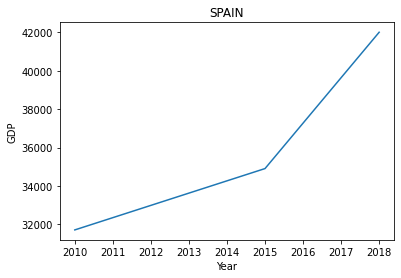

In [ ]:
d = df[df['Country Name']=='Spain']
plt.plot('Year','NY.GDP.PCAP.PP.CD', data=d)
plt.title('SPAIN')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [ ]:
df.isnull().any()

Unnamed: 0              False
Year                    False
SE.ADT.1524.LT.FM.ZS    False
NY.GDP.PCAP.PP.CD       False
SH.ALC.PCAP.LI          False
Country Code            False
Country Name            False
Region                  False
Income Group            False
Lending Type            False
dtype: bool

I chose the data viz to be between 2015 to 2020 and for the following country&#39;s:

- Central African Republic
- Spain
- Singapore
- UAE
- India
- Chile
- Tanzania
- Chad
- Indonesia
- Pakisthan
- Azerbaijan
- Turkey
- Oman

The Bar charts in the next page explain more detail about these relationships. _ **Total alcohol consumption per capita is mostly high where litercay rate is low** _ and vice versa.

And the scatter plot represents how alcohol consumption rate per capita is effecting the GDP total. _ **Wherever alcohol consumption per capita is high GDP is also high** _ and vice versa – there are no outliers in the data filters I have applied. !

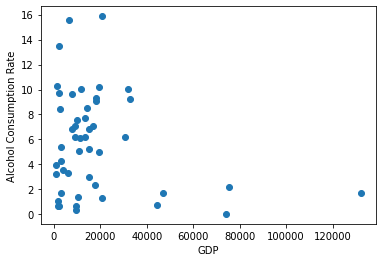

In [ ]:
df2 = df[df['Year'] == 2010]
plt.scatter('NY.GDP.PCAP.PP.CD','SH.ALC.PCAP.LI',data=df2)
plt.xlabel('GDP')
plt.ylabel('Alcohol Consumption Rate')
plt.show()

<BarContainer object of 36 artists>

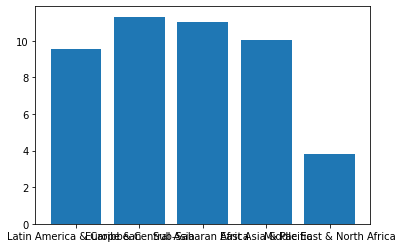

In [ ]:
d1 = df[df['Year'] == 2015]
plt.bar('Region','SH.ALC.PCAP.LI',data=d1)



<BarContainer object of 36 artists>

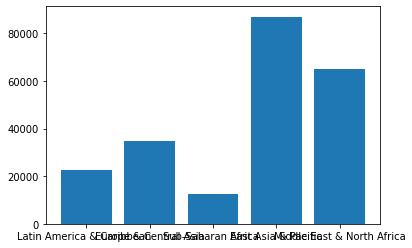

In [ ]:
d1 = df[df['Year'] == 2015]
plt.bar('Region','NY.GDP.PCAP.PP.CD',data=d1)


**Literacy Rate vs Children working (15-24yrs)**


In [ ]:
dff=pd.read_csv('wdi_data_children.csv')
dff.head()

,Unnamed: 0,Year,SL.TLF.0714.SW.ZS,SE.ADT.1524.LT.FM.ZS,NY.GDP.PCAP.PP.CD,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2012,95.247060,1.00472,19641.352864,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
1,1,2012,67.600000,0.64025,2498.497313,BEN,Benin,Sub-Saharan Africa,Lower middle income,IDA
2,2,2015,93.280000,1.00010,7133.874458,BOL,Bolivia,Latin America & Caribbean,Lower middle income,IBRD
3,3,2011,96.406316,1.01174,15040.058183,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
4,4,2013,95.004290,1.00985,15588.726206,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD


For this scenario , a scatterplot answers my questions – Yes literacy rate is dependent upon Children employment – which means most of the students that are working might not be educated, illiterates and have never been to school. Whenever the children in employment is high the literacy rate is low and whenever the literacy rate is high , the children employment rate is low – which is also indirectly affective on GDP of a country from previous visualization.

So, from the analysis :

- Children employment rate∝ (1/ Literacy rate)
- Literacy rate∝ GDP
- Children employment rate ∝ 1/GDP
- So, Whenever there are more child employees in a country , its GDP decreases.



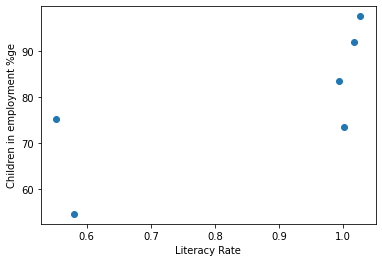

In [ ]:
d2 = dff[dff['Year'] == 2010]
plt.scatter('SE.ADT.1524.LT.FM.ZS','SL.TLF.0714.SW.ZS',data=d2)
plt.xlabel('Literacy Rate')
plt.ylabel('Children in employment %ge')
plt.show()

**Literacy rate GPI vs GDP**


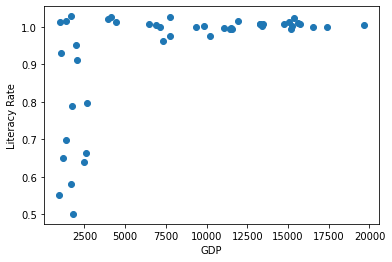

In [ ]:
plt.scatter('NY.GDP.PCAP.PP.CD','SE.ADT.1524.LT.FM.ZS',data=dff)
plt.xlabel('GDP')
plt.ylabel('Literacy Rate')
plt.show()

From this analysis, The GDP doesn&#39;t seem to be relevant with Literacy rate(15-24 yrs) GPI . So country&#39;s GDP is not dependent on GPI.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f415496f-a148-437a-9485-6110d5ba3018' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>